In [1]:


import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')



In [2]:


df=pd.read_csv("Company_Data.csv")
df



,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:


df.isna().sum()



Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:


df.describe()



,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:


df.Sales.mean()



7.496325000000001

In [6]:


df.corr()



,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<Axes: >

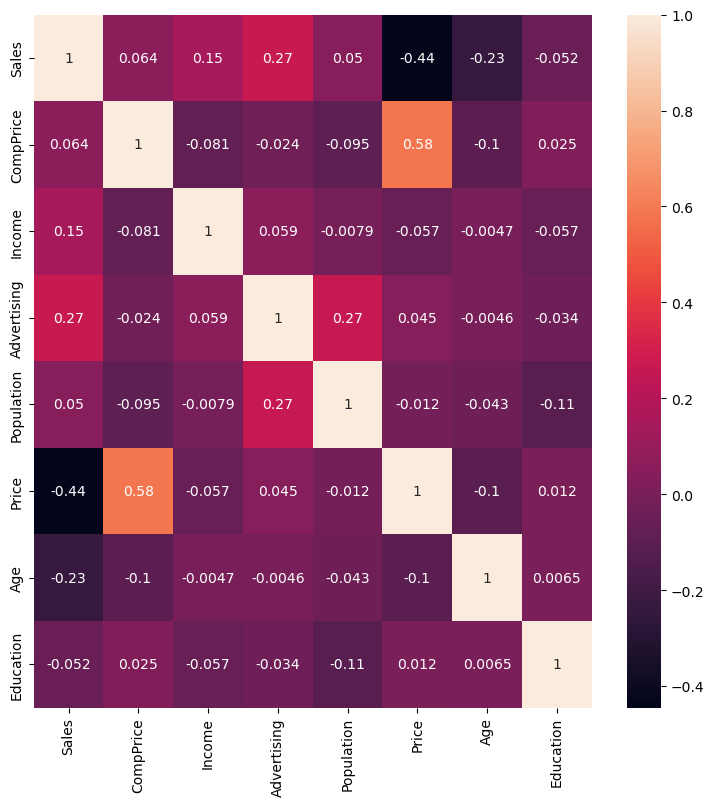

In [7]:
import matplotlib.pyplot as plt  # Add this line to import the module

plt.figure(figsize=[9,9])
sns.heatmap(df.corr(), annot=True)


In [8]:
df.Sales = [1 if i >= df.Sales.mean() else 0 for i in df.Sales]

df



,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


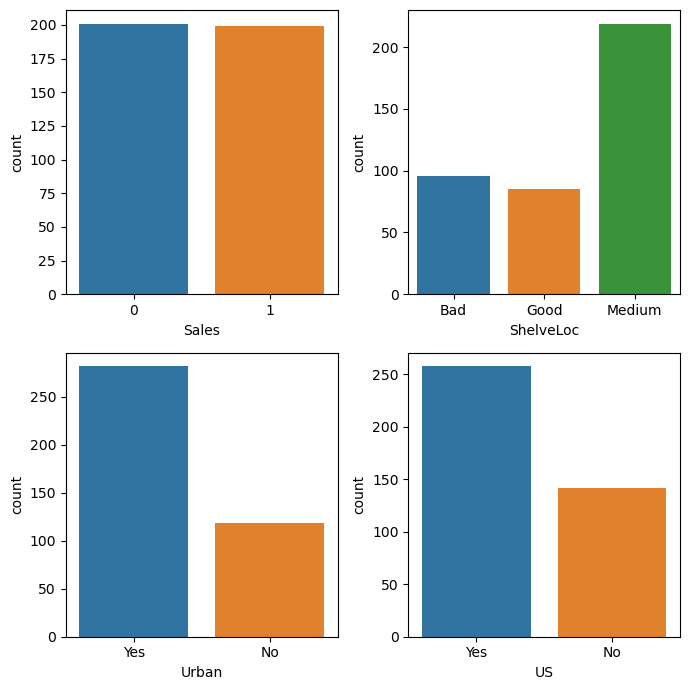

In [9]:



plt.figure(figsize=[7,7])
plt.subplot(2,2,1)
sns.countplot(x=df['Sales'])

plt.subplot(2,2,2)
sns.countplot(x=df['ShelveLoc'])

plt.subplot(2,2,3)
sns.countplot(x=df['Urban'])

plt.subplot(2,2,4)
sns.countplot(x=df['US'])

plt.tight_layout()



In [10]:


#preprocessing the categorical variable
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df['ShelveLoc']=LE.fit_transform(df['ShelveLoc'])
df['Urban']=LE.fit_transform(df['Urban'])
df['US']=LE.fit_transform(df['US'])

df



,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


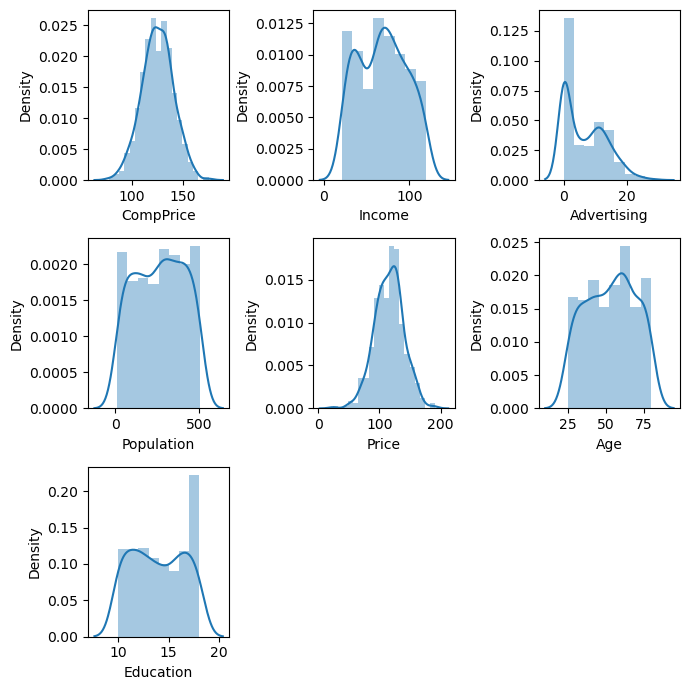

In [11]:
plt.figure(figsize=[7,7])
plt.subplot(3,3,1)
sns.distplot(df['CompPrice'])

plt.subplot(3,3,2)
sns.distplot(df['Income'])

plt.subplot(3,3,3)
sns.distplot(df['Advertising'])

plt.subplot(3,3,4)
sns.distplot(df['Population'])

plt.subplot(3,3,5)
sns.distplot(df['Price'])

plt.subplot(3,3,6)
sns.distplot(df['Age'])

plt.subplot(3,3,7)
sns.distplot(df['Education'])

plt.tight_layout()

In [12]:
#data cleaning ,removing an outliers
from sklearn.ensemble import IsolationForest

# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

#predictions
y_pred_outliers = clf.predict(df)
y_pred_outliers       

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [13]:
df['Outliers']=y_pred_outliers
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Outliers
0,1,138,73,11,276,120,0,42,17,1,1,1
1,1,111,48,16,260,83,1,65,10,1,1,1
2,1,113,35,10,269,80,2,59,12,1,1,1
3,0,117,100,4,466,97,2,55,14,1,1,1
4,0,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1,1
396,0,139,23,3,37,120,2,55,11,0,1,1
397,0,162,26,12,368,159,2,40,18,1,1,1
398,0,100,79,7,284,95,0,50,12,1,1,1


In [14]:
df[df.Outliers==-1] # there are 4 outliers

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Outliers
5,1,124,113,13,501,72,0,78,16,0,1,-1
42,1,77,69,0,25,24,2,50,18,1,0,-1
75,1,88,111,23,480,92,0,36,16,0,1,-1
208,1,86,54,0,497,64,0,33,12,1,0,-1


In [15]:


data= df.drop(df.index[[5,42,75,208]],axis=0).reset_index()
data



,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Outliers
0,0,1,138,73,11,276,120,0,42,17,1,1,1
1,1,1,111,48,16,260,83,1,65,10,1,1,1
2,2,1,113,35,10,269,80,2,59,12,1,1,1
3,3,0,117,100,4,466,97,2,55,14,1,1,1
4,4,0,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,395,1,138,108,17,203,128,1,33,14,1,1,1
392,396,0,139,23,3,37,120,2,55,11,0,1,1
393,397,0,162,26,12,368,159,2,40,18,1,1,1
394,398,0,100,79,7,284,95,0,50,12,1,1,1


In [16]:


#remove extra columns
data=data.drop(['Outliers','index'],axis=1)

data



,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
391,1,138,108,17,203,128,1,33,14,1,1
392,0,139,23,3,37,120,2,55,11,0,1
393,0,162,26,12,368,159,2,40,18,1,1
394,0,100,79,7,284,95,0,50,12,1,1


In [17]:


data.Sales.value_counts()



0    201
1    195
Name: Sales, dtype: int64

In [18]:
#dividing data
x=df.iloc[:,1:]
y=df.iloc[:,0]

#standerization
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
MM_x=MM.fit_transform(x)

#split data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(MM_x,y,test_size=0.3,random_state=40)

#by using entropy
from sklearn.ensemble import RandomForestClassifier     
RFC= RandomForestClassifier(max_samples = 0.7,
                       n_estimators = 100,
                       max_features = 0.6,
                       random_state=24,max_depth=10)



In [19]:
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=0.6, max_samples=0.7,
                       random_state=24)

In [20]:
Y_pred_train= RFC.predict(x_train)
Y_pred_test= RFC.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
cm=confusion_matrix(y_test,Y_pred_test)
cm



array([[53, 15],
       [10, 42]], dtype=int64)

In [21]:
ac=accuracy_score(y_test,Y_pred_test)
print("accuracy score:",ac.round(2))

accuracy score: 0.79


In [22]:
t1=np.array([[1,2,3,4,5,6,7,8,9,10,11]])
RFC.predict(t1)

array([1], dtype=int64)

In [23]:
#grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [24]:


parameters=[{'n_estimators':[100,200,300,500,800,1200], 'criterion': ['entropy', 'gini'], 'max_depth':[5,8,10,15,20,25,30]}]
classifier=RandomForestClassifier(random_state=1)

In [25]:


#using this parameter
model1=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=20)
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
pred1



array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [26]:


ac=accuracy_score(y_test,pred1)
print("accuracy score:",ac.round(2))



accuracy score: 0.77


In [27]:
model1.score(x_test,y_test)



0.7666666666666667

In [28]:
#model validation
#k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds =10

kfold = KFold(n_splits=num_folds, random_state=None)
model2 = RandomForestClassifier(n_estimators=100,max_depth=20,criterion='entropy',random_state =1)
results = cross_val_score(model2,MM_x,y,cv=kfold)

print(results.mean()*100.0)
print(results.std()*100)

81.5
5.385164807134505


In [29]:
#using leave one out cross validation
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model_LOO = RandomForestClassifier(n_estimators=100,criterion = 'entropy',max_depth=20)
result = cross_val_score(model_LOO, MM_x,y, cv=loocv)

print(result.mean()*100.0)
print(result.std()*100)



80.5
39.62007067131506
